In [36]:
import pandas as pd 
import numpy as np 
import sklearn 
from sklearn.model_selection import cross_validate 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [27]:
traindata = pd.read_excel('F:/Amino acid-classifier/classifier/data/training_set_20aa.xlsx')

X = traindata[['mean', 'std', 'skew', 'kurt', 'toff']]
y = traindata['label']
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)

In [28]:
testdata = pd.read_excel('F:/Amino acid-classifier/classifier/data/testing_set_20aa.xlsx')
test_X = testdata.iloc[:, 0:5]
test_X = StandardScaler().fit_transform(test_X)
target = LabelEncoder().fit_transform(testdata['label'])


In [29]:
encoder = OneHotEncoder(categories='auto')  
L = encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [30]:
scc = ['accuracy', 'precision', 'recall', 'f1','roc_auc']

In [31]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
result = cross_validate(model, X, y, scoring=scc, cv=10)

C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y

In [32]:
result['test_accuracy'].mean()

0.9893750000000001

In [33]:
model.fit(X,y)

RandomForestClassifier(n_estimators=200, random_state=42)

In [34]:
y_test = model.predict(test_X)

In [35]:
probs = model.predict_proba(test_X)
roc_auc = roc_auc_score(target, probs, multi_class="ovo")
roc_auc

0.9993106725146199

In [39]:
precision = precision_score(target, y_test, average='macro') 
recall = recall_score(target, y_test, average='macro')
f1 = f1_score(target, y_test, average='macro')
mcc = matthews_corrcoef(target, y_test)

print('f1_score is:', f1)
print('recall score is:', recall)
print('precision is:', precision)
print('mcc is:', mcc)

f1_score is: 0.981681169297047
recall score is: 0.9816666666666667
precision is: 0.9825633895060463
mcc is: 0.9807505063538305


In [13]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

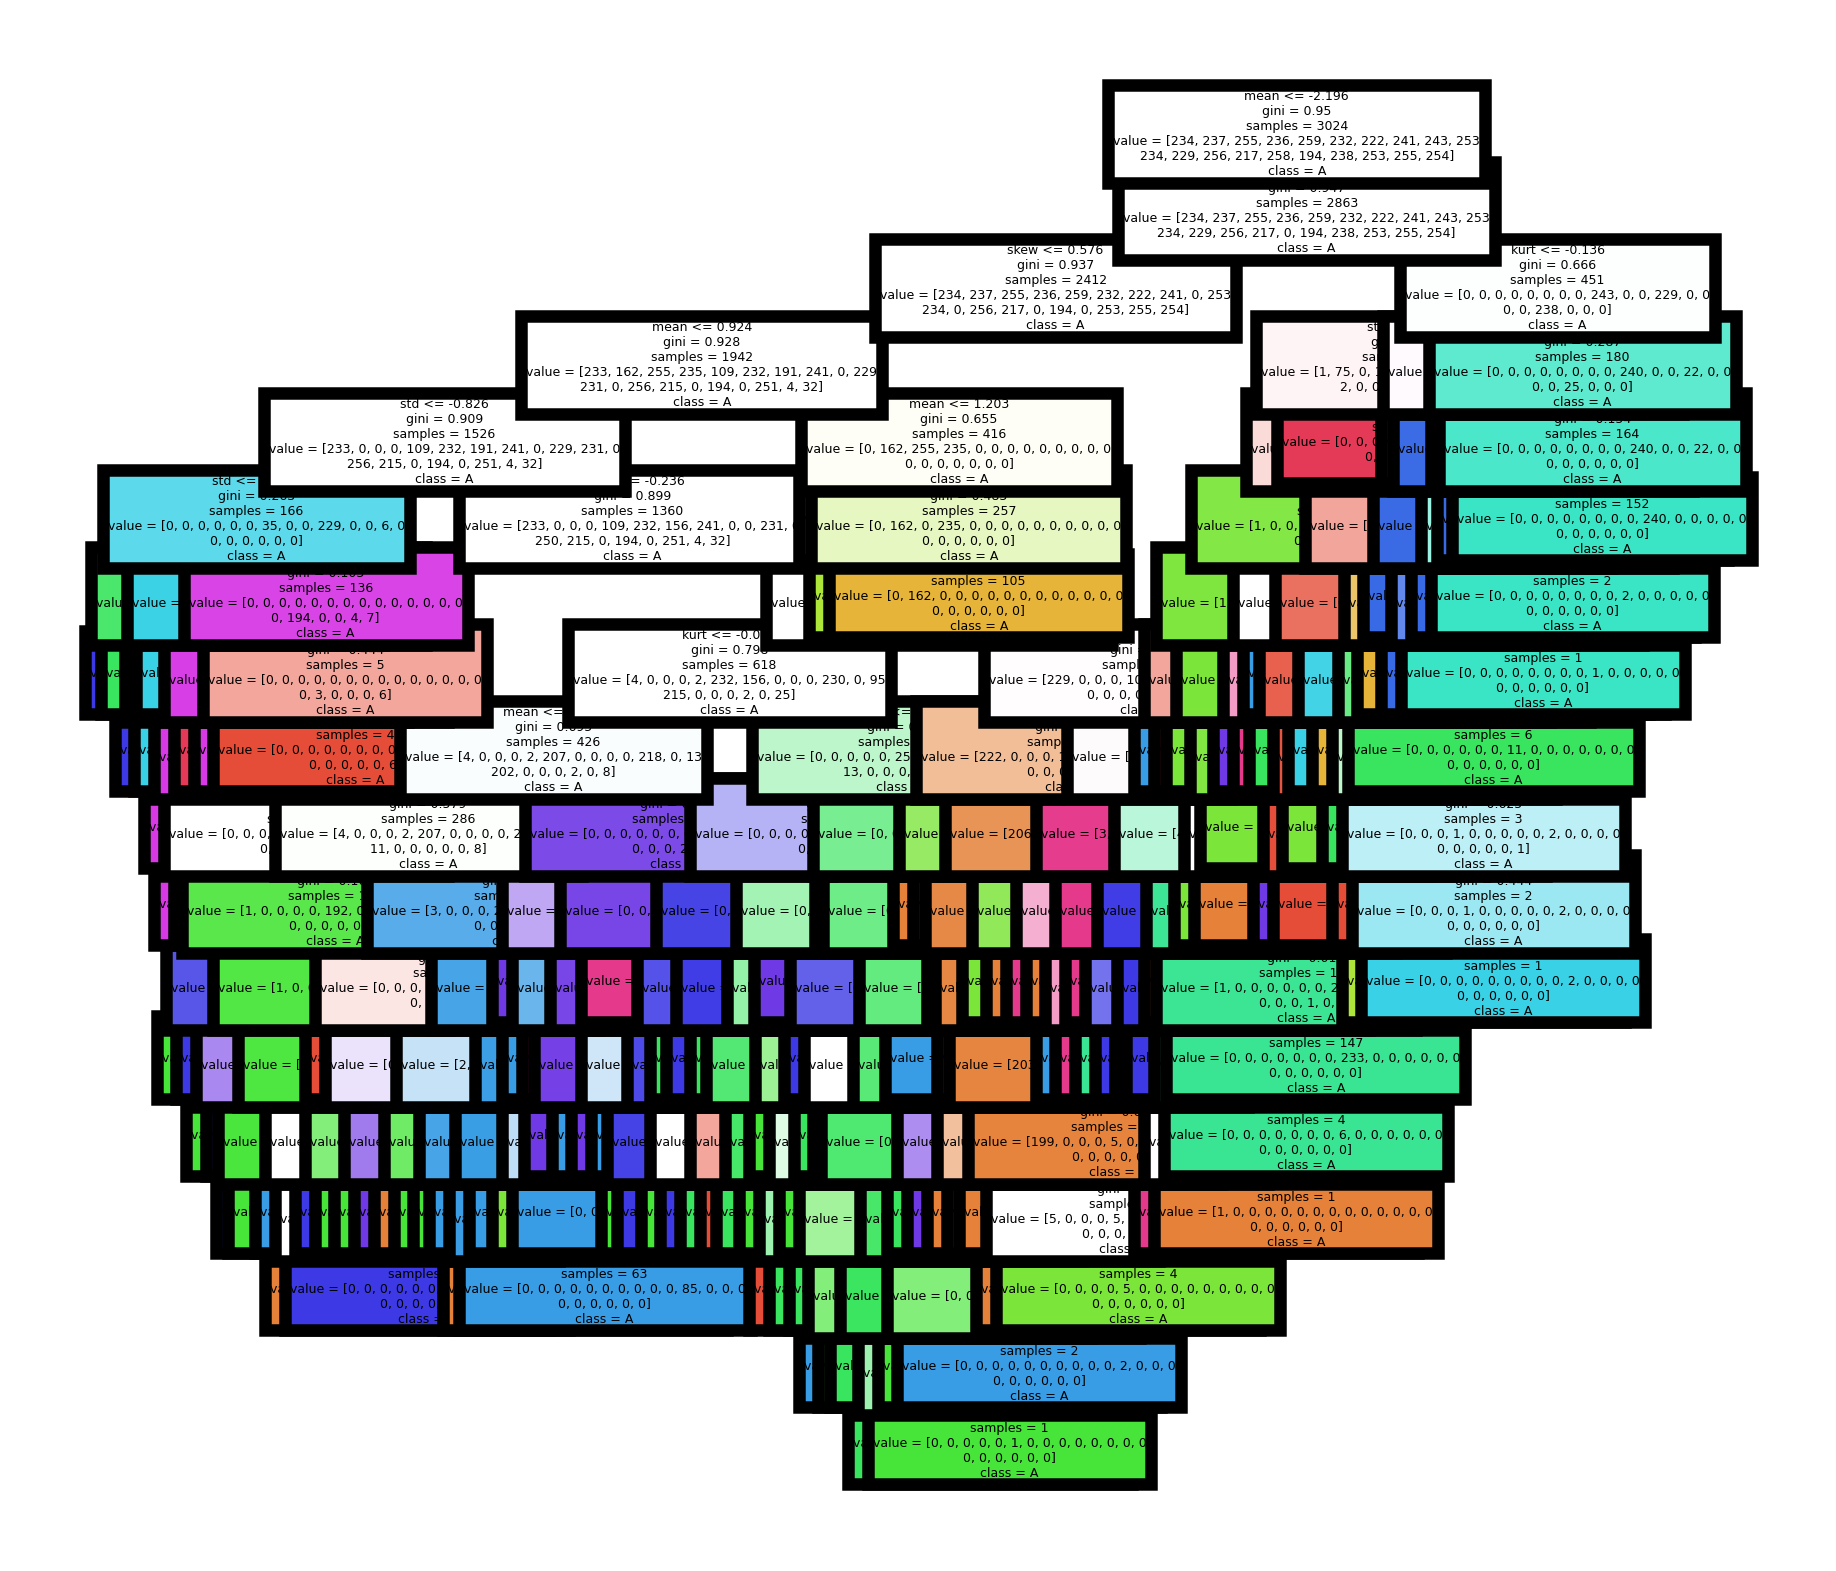

In [145]:
from sklearn.tree import export_graphviz
import os
from sklearn import tree
fn=traindata.iloc[:, 0:5].columns
cn=traindata['label']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=900)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')